In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd

def nat_log(lst):
    log_lst = []
    for x in lst:
        if x > 0:
            log_x = np.log10(x)
        elif x < 0:
            log_x = -1 * np.log10(-x)
        log_lst.append(log_x)
    return log_lst


def histogram_density(alpha):
    n = 10000
    lst = []
    for i in range(n):
        u = np.random.exponential(alpha**2/2)
        # generate a single sample of normal distribution
        x = np.random.normal(0, u)
        lst.append(x)

    x_values = np.linspace(-20, 20, 10000)
    plt.plot(x_values, lst)
    plt.show()

def log_ksdensity(alpha):
    n = 10000
    lst = []
    for i in range(n):
        u = np.random.exponential(alpha**2/2)
        # generate a single sample of normal distribution
        x = np.random.normal(0, u)
        lst.append(x)

    x_values = np.linspace(-20, 20, 10000)
    ks_density = ksdensity(nat_log(lst), width=0.2)

    plt.plot(x_values, ks_density(x_values))
    plt.show()

In [3]:
# tested to be working
def sample_gamma(N, theta):
    v = np.random.gamma(theta, 1 / theta, N)
    u = 1/v
    return u

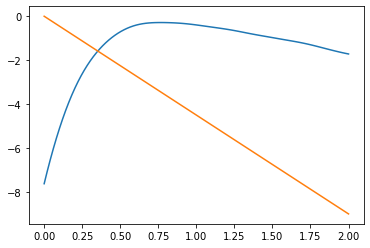

In [4]:
theta = 3
exp_samples = sample_gamma(N=10000, theta=theta)
x_space = np.linspace(0, 2, 100)
ksd = ksdensity(exp_samples, width=0.1)
plt.plot(x_space, np.log(ksd(x_space)))
plt.plot(x_space, -theta*theta/2*x_space)
plt.show()

In [5]:
def sample_unknown(N, theta):
    rand_variance = sample_gamma(N, theta)
    result = []
    for rand_var in rand_variance:
        result.append(np.random.normal(0, np.sqrt(rand_var), 50))
    return np.array(result)

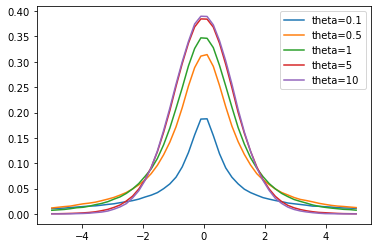

In [6]:
theta_list = [0.1, 0.5, 1, 5, 10]
for theta in theta_list:
    sample_array = sample_unknown(10000, theta)
    x_space = np.linspace(-5, 5, 50)
    ks_function = ksdensity(sample_array, width=0.1)
    plt.plot(x_space, (ks_function(x_space)), label='theta='+str(theta))
plt.legend()
plt.show()

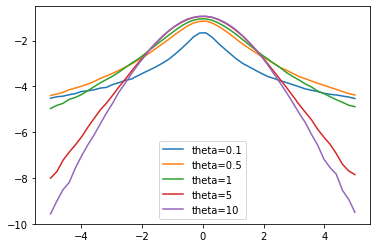

In [7]:
theta_list = [0.1, 0.5, 1, 5, 10]
for theta in theta_list:
    sample_array = sample_unknown(10000, theta)
    x_space = np.linspace(-5, 5, 50)
    ks_function = ksdensity(sample_array, width=0.1)
    plt.plot(x_space, np.log(ks_function(x_space)), label='theta='+str(theta))
plt.legend()
plt.show()

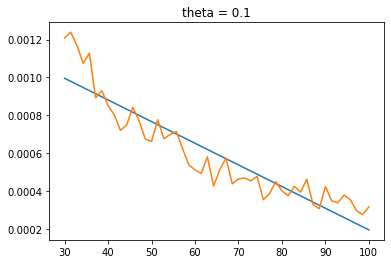

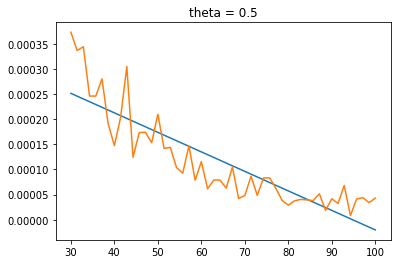

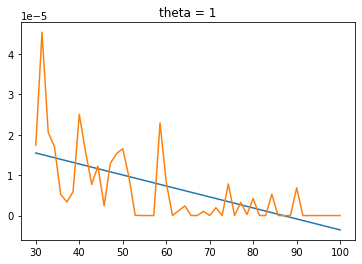

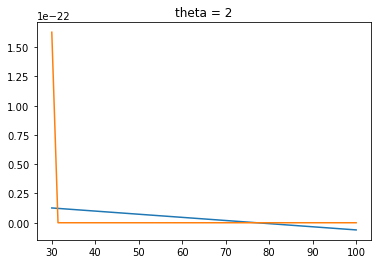

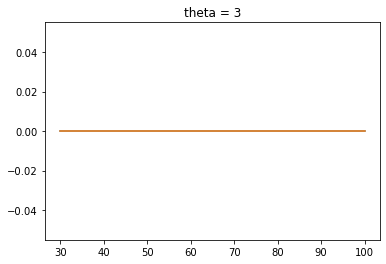

[-1.14457744e-05 -3.88157483e-06 -2.71844333e-07 -2.68142724e-25
  0.00000000e+00]


In [8]:
theta_list = [0.1, 0.5, 1, 2, 3]
grad_list = []
for theta in theta_list:
    width = 0.1
    #sample_array = sample_unknown(N=10000, theta=theta)
    sample_array = sample_unknown(10000, theta)
    x_space = np.linspace(30, 100, 50)
    ks_function = ksdensity(sample_array, width=0.1)
    ks_value = ks_function(x_space)
    #ks_function = ksdensity(sample_array, width=width)
    #x_space = np.linspace(width*2, width*15, 100)
    #x_space2 = np.linspace(-width*15, width*15, 100)
    #lg_ks_value = np.log(ks_function(x_space))
    

    linear = lambda x, a, b: a*x + b
    params, _ = curve_fit(linear, x_space, ks_value)
    grad_list.append(params[0])
    
    #plt.plot(x_space2, np.log(ks_function(x_space2)), label='ksd')
    plt.plot(x_space, linear(x_space, params[0], params[1]), label='linear fit')
    plt.plot(x_space, (ks_function(x_space)), label='theta='+str(theta))
    plt.title('theta = ' + str(theta))
    plt.show()

grad_list = np.array(grad_list)
print(grad_list)

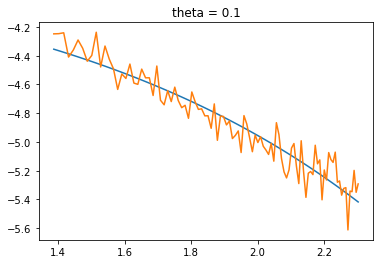

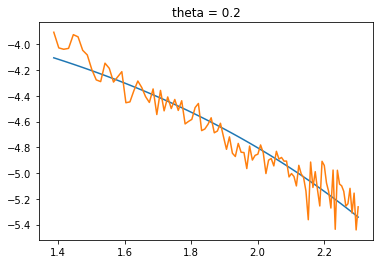

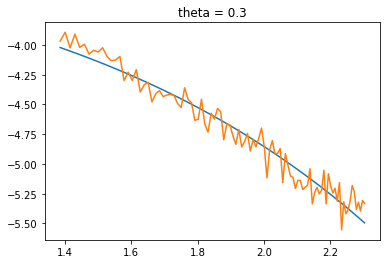

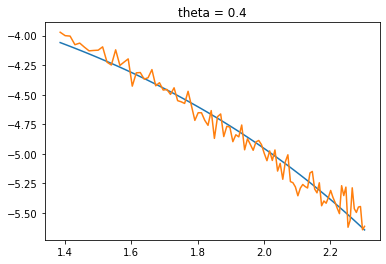

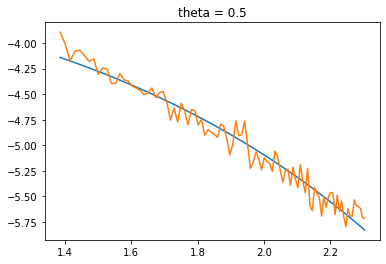

[-0.17710949 -0.20613633 -0.2455439  -0.26389212 -0.28142728]


In [37]:
theta_list = [0.1, 0.2, 0.3, 0.4, 0.5]
log_grad_list = []
for theta in theta_list:
    width = 0.01
    #sample_array = sample_unknown(N=10000, theta=theta)
    sample_array = sample_unknown(10000, theta)
    x_space = np.linspace(4, 10, 100)
    ks_function = ksdensity(sample_array, width=0.01)
    ks_value = np.log(ks_function(x_space))
    #ks_function = ksdensity(sample_array, width=width)
    #x_space = np.linspace(width*2, width*15, 100)
    #x_space2 = np.linspace(-width*15, width*15, 100)
    #lg_ks_value = np.log(ks_function(x_space))
    

    linear = lambda x, a, b: a*x + b
    params, _ = curve_fit(linear, x_space, ks_value)
    log_grad_list.append(params[0])
    
    #plt.plot(x_space2, np.log(ks_function(x_space2)), label='ksd')
    plt.plot(np.log(x_space), linear(x_space, params[0], params[1]), label='linear fit')
    plt.plot(np.log(x_space), np.log(ks_function(x_space)), label='theta='+str(theta))
    plt.title('theta = ' + str(theta))
    plt.show()

log_grad_list = np.array(log_grad_list)
theta_list = np.array(theta_list)
print(log_grad_list)

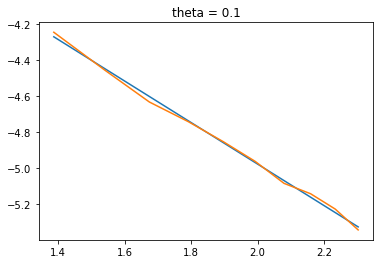

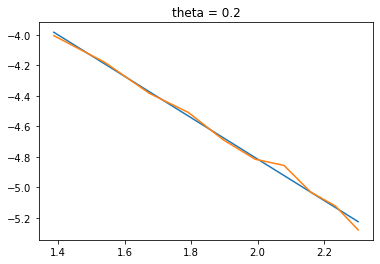

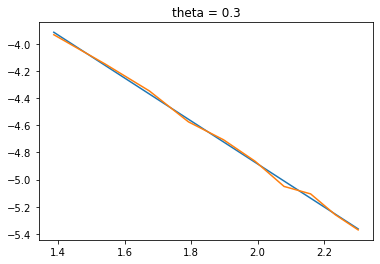

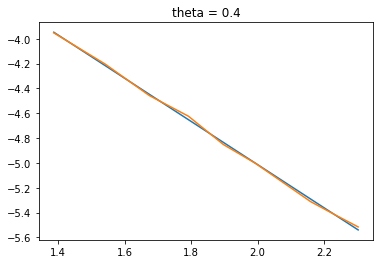

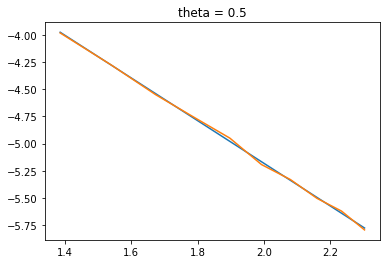

[-1.15512651 -1.35769726 -1.57841316 -1.73825277 -1.96996196]


In [14]:
theta_list = [0.1, 0.2, 0.3, 0.4, 0.5]
log_grad_list = []
for theta in theta_list:
    width = 0.01
    #sample_array = sample_unknown(N=10000, theta=theta)
    sample_array = sample_unknown(100000, theta)
    x_space = np.linspace(4, 10, 10)
    ks_function = ksdensity(sample_array, width=0.01)
    ks_value = ks_function(x_space)
    #ks_function = ksdensity(sample_array, width=width)
    #x_space = np.linspace(width*2, width*15, 100)
    #x_space2 = np.linspace(-width*15, width*15, 100)
    #lg_ks_value = np.log(ks_function(x_space))
    

    linear = lambda x, a, b: a*x + b
    params, _ = curve_fit(linear, np.log(x_space), np.log(ks_value))
    log_grad_list.append(params[0])
    
    #plt.plot(x_space2, np.log(ks_function(x_space2)), label='ksd')
    plt.plot(np.log(x_space), linear(np.log(x_space), params[0], params[1]), label='linear fit')
    plt.plot(np.log(x_space), np.log(ks_value), label='theta='+str(theta))
    plt.title('theta = ' + str(theta))
    plt.show()

log_grad_list = np.array(log_grad_list)
theta_list = np.array(theta_list)
print(log_grad_list)

[-2.0102264  -0.95682241]


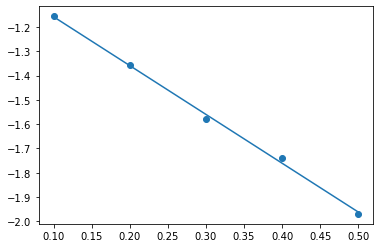

In [16]:
linear = lambda x, a, b: a*x + b
params, _ = curve_fit(linear, theta_list, log_grad_list)
print(params)


plt.scatter(theta_list, log_grad_list)
plt.plot(theta_list, linear(theta_list, params[0], params[1]))
plt.show()